## Prepare the uncertainty maps of the amplifications

In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
from matplotlib.patches import Ellipse

import seaborn as sns
sns.set(style="whitegrid")

import numpy as np

from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from astropy.stats import median_absolute_deviation
from astropy.wcs import WCS
from reproject import reproject_interp

import glob

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

## AS1063

Load all the amplificationmaps

In [2]:
def load_data(folder):
    files = glob.glob(folder+'*.fits')[0:10]
    data = fits.getdata(files[0])
    for f in files[1:]:
        amp = fits.getdata(f)
        data = np.dstack((data,amp))
    return data

folder = '../Data/LensigStuff/AS1063/AS1063mu/'
as1063_amp = load_data(folder)

Calculate the std and write down the file

In [20]:
as1063_amp_mean = as1063_amp.mean(axis=2) 
as1063_amp_std = as1063_amp.std(axis=2)
as1063_amp_mad = 1.4826*median_absolute_deviation(as1063_amp,axis=2)
## from wikipedia: https://en.wikipedia.org/wiki/Median_absolute_deviation

header = fits.getheader('../Data/LensigStuff/AS1063/AS1063mu/ampli_10.fits')
fits.writeto('../Data/LensigStuff/AS1063/ampli_uncertainty.fits',data=as1063_amp_std,header=header,overwrite=True)
fits.writeto('../Data/LensigStuff/AS1063/ampli_mad_uncertainty.fits',data=as1063_amp_mad,header=header,overwrite=True)

<IPython.core.display.Javascript object>


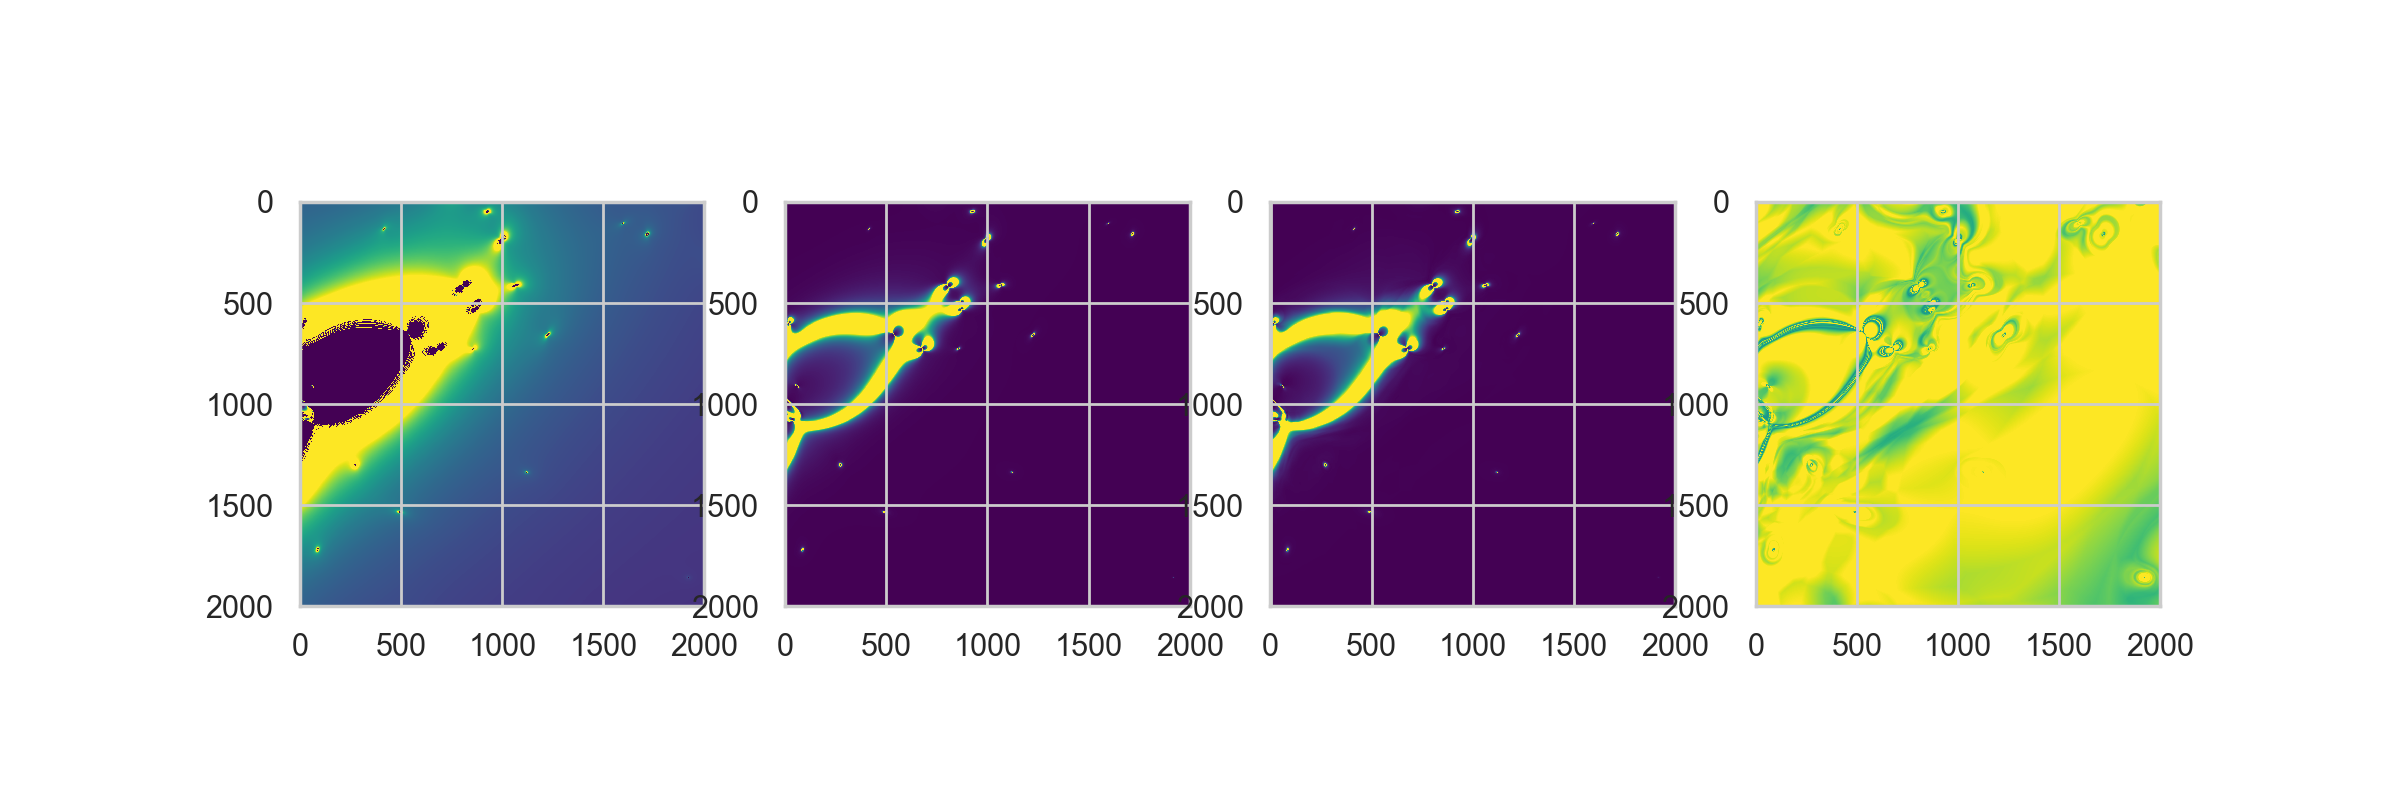

In [21]:
fig, ax = plt.subplots(1,4,figsize=(12,4))

ax[0].imshow(as1063_amp_mean,cmap='viridis',vmin=0,vmax=10)
ax[1].imshow(as1063_amp_std,cmap='viridis',vmin=0,vmax=10)
ax[2].imshow(as1063_amp_mad,cmap='viridis',vmin=0,vmax=10)
ax[3].imshow(as1063_amp_mad/as1063_amp_std,cmap='viridis',vmin=-1,vmax=1)

## A521

In [15]:
folder = '../Data/LensigStuff/A521/A521mu/'
a521_amp = load_data(folder)

In [22]:
a521_amp_mean = a521_amp.mean(axis=2) 
a521_amp_std = a521_amp.std(axis=2)
a521_amp_mad = 1.4826*median_absolute_deviation(a521_amp,axis=2)

header = fits.getheader('../Data/LensigStuff/A521/A521mu/testampli100.fits')
fits.writeto('../Data/LensigStuff/A521/A521_ampli_uncertainty.fits',data=a521_amp_std,header=header,overwrite=True)
fits.writeto('../Data/LensigStuff/A521/A521_ampli_mad_uncertainty.fits',data=a521_amp_mad,header=header,overwrite=True)

<IPython.core.display.Javascript object>


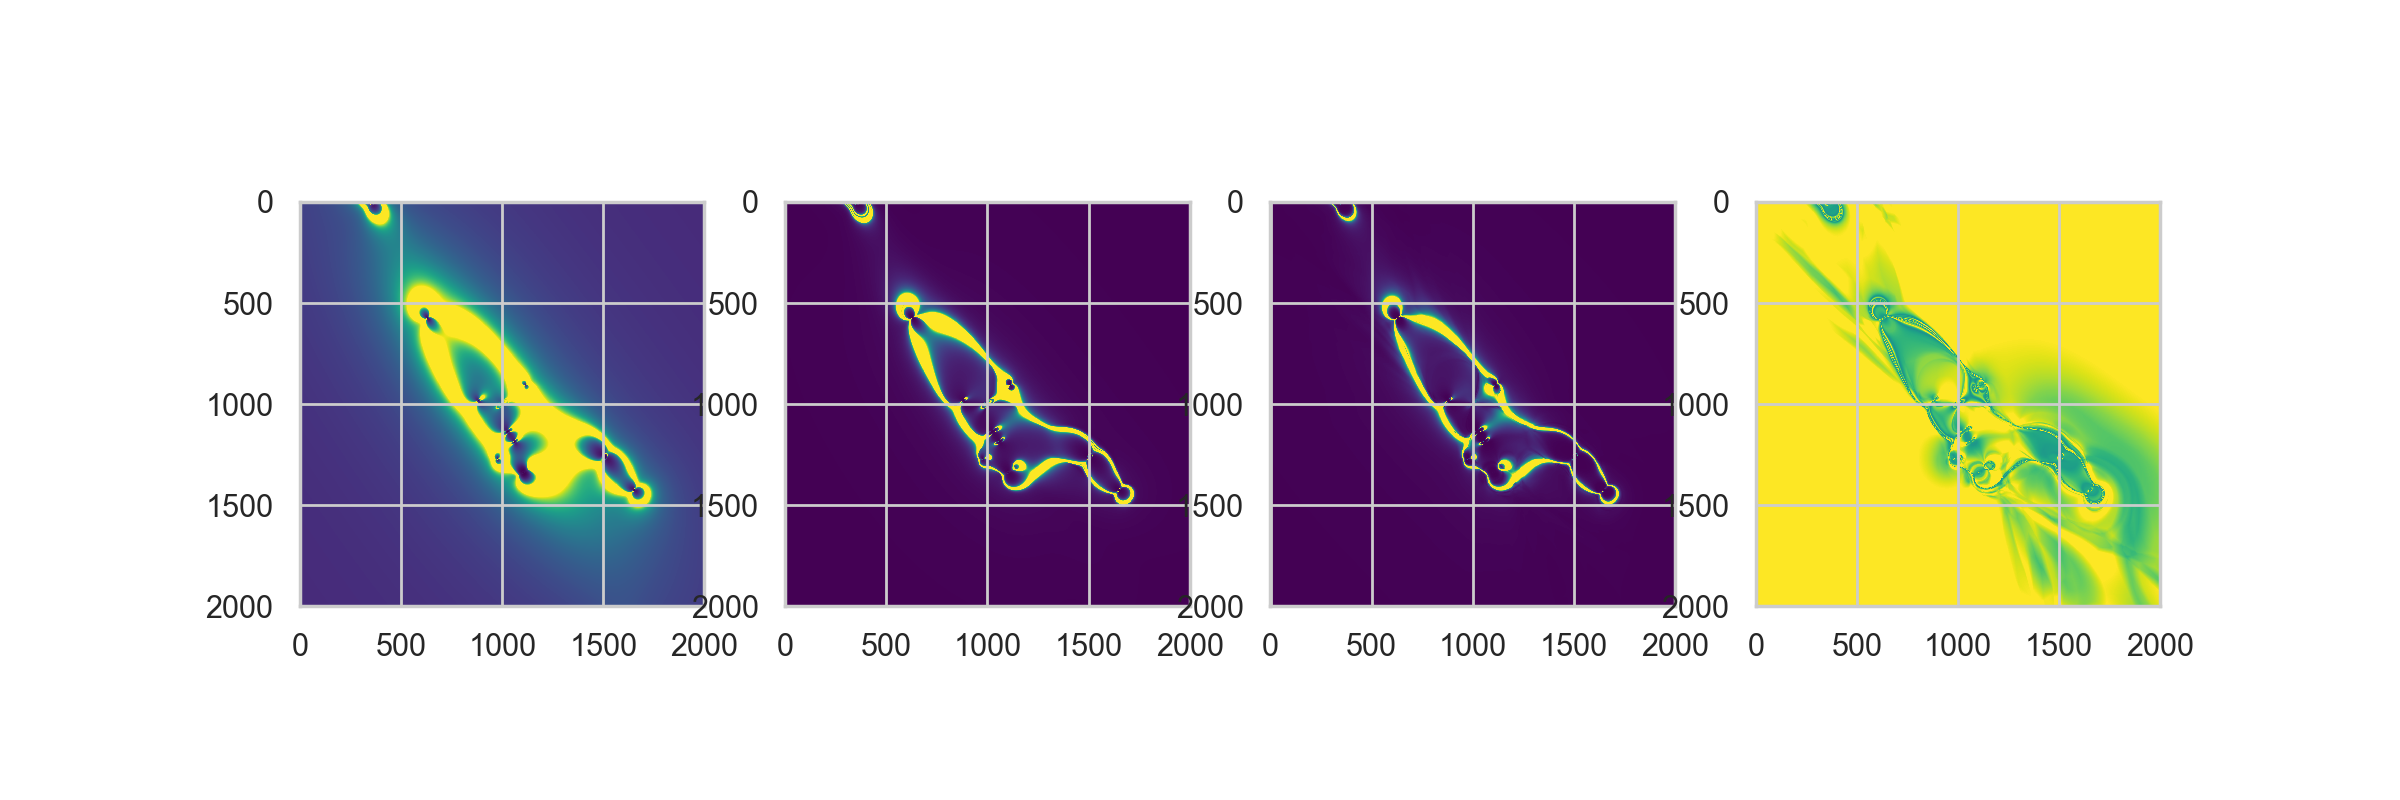

In [23]:
fig, ax = plt.subplots(1,4,figsize=(12,4))

ax[0].imshow(a521_amp_mean,cmap='viridis',vmin=0,vmax=10)
ax[1].imshow(a521_amp_std,cmap='viridis',vmin=0,vmax=10)
ax[2].imshow(a521_amp_mad,cmap='viridis',vmin=0,vmax=10)
ax[3].imshow(a521_amp_mad/a521_amp_std,cmap='viridis',vmin=-1,vmax=1)

## Snake

In [24]:
folder = '../Data/LensigStuff/MACS1206/MACS1206mu/'
snake_amp = load_data(folder)

In [25]:
snake_amp_mean = snake_amp.mean(axis=2) 
snake_amp_std = snake_amp.std(axis=2)
snake_amp_mad = 1.4826*median_absolute_deviation(snake_amp,axis=2)

header = fits.getheader('../Data/LensigStuff/MACS1206/MACS1206mu/ampli_1.fits')
fits.writeto('../Data/LensigStuff/MACS1206/MACS1206_ampli_uncertainty.fits',data=snake_amp_std,header=header,overwrite=True)
fits.writeto('../Data/LensigStuff/MACS1206/MACS1206_ampli_mad_uncertainty.fits',data=snake_amp_mad,header=header,overwrite=True)

<IPython.core.display.Javascript object>


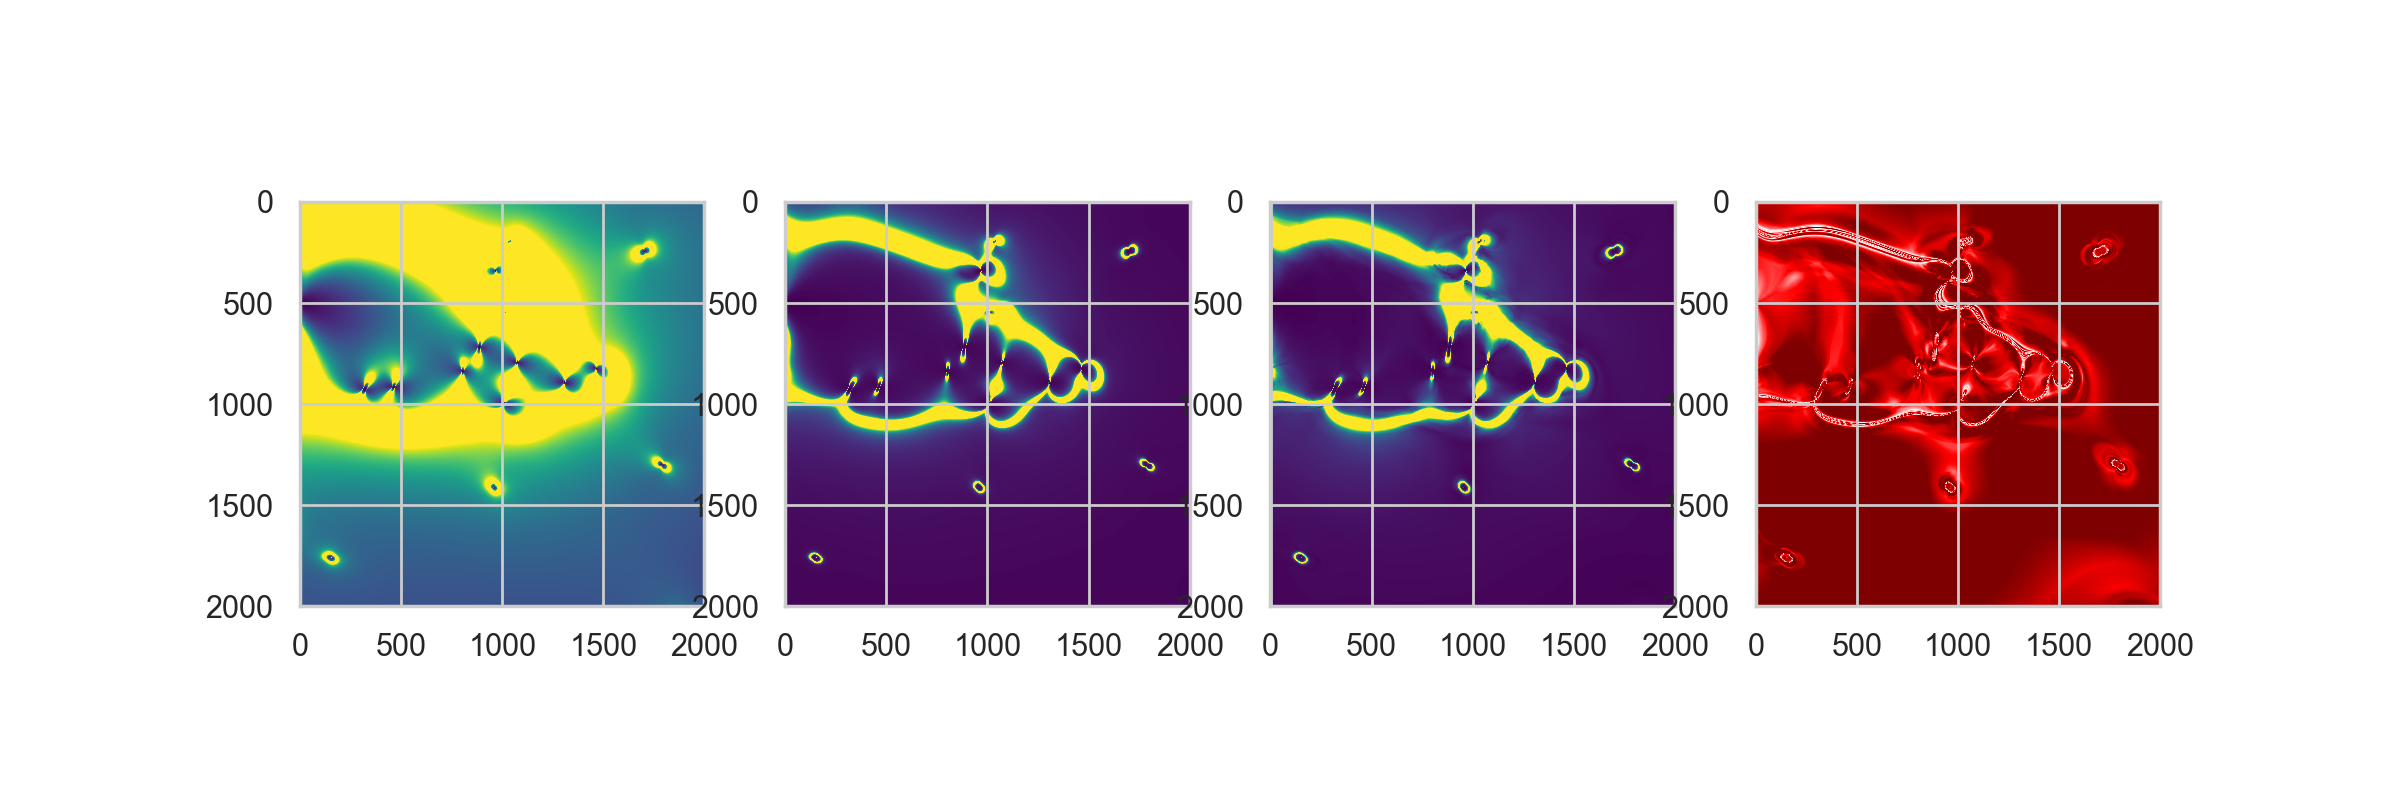

In [28]:
fig, ax = plt.subplots(1,4,figsize=(12,4))

ax[0].imshow(snake_amp_mean,cmap='viridis',vmin=0,vmax=10)
ax[1].imshow(snake_amp_std,cmap='viridis',vmin=0,vmax=10)
ax[2].imshow(snake_amp_mad,cmap='viridis',vmin=0,vmax=10)
ax[3].imshow(snake_amp_mad/snake_amp_std,cmap='seismic',vmin=-1,vmax=1)